# Task 1 (Producing the N-Body Code: - Tan Wen Hans )

I've decided to write the code in a class format to ease in readability and reusability. It allows the user to recreate the simulation with different parameters and initial conditions. I've placed my class in a seperate Python Module and then import it into this file. This makes the code more easy to access and reuse. 

In [78]:
import numpy as np 
import matplotlib.pyplot as plt

#Using dimensionless Units for N-particle system 
from Task_1 import NBodySimulation_T1

## 2 Particle Scenario with Simple Parameters (Varying Distances)

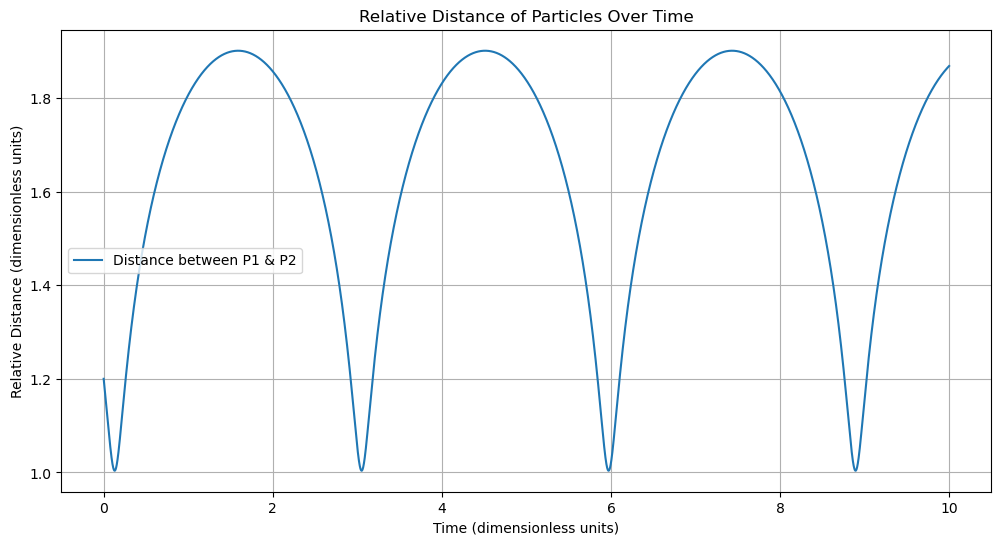

In [79]:
#We assume a simple simulation with simple parameters first - and let sigma, epsilon and m_a to be all 1.0
sim = NBodySimulation_T1(
    positions=[[0, 0, 0], [1.2, 0, 0]],# Place one particle at the origin and the other on the x-axis
    velocities=[[0.8, 0, 0], [-1.0, 0, 0]],# Start with both particles at rest or with some initial velocity
    masses=[1, 1],# Masses of the particles - standard mass
    dt=0.001 # Time step for the simulation
)

steps= 10000
sim.plot_relative_distance(steps)

The above code clearly shows that there is an oscillating behaviour between both of the particles. However, let's check to see what happens when we reduce the distance between both of the particles: 

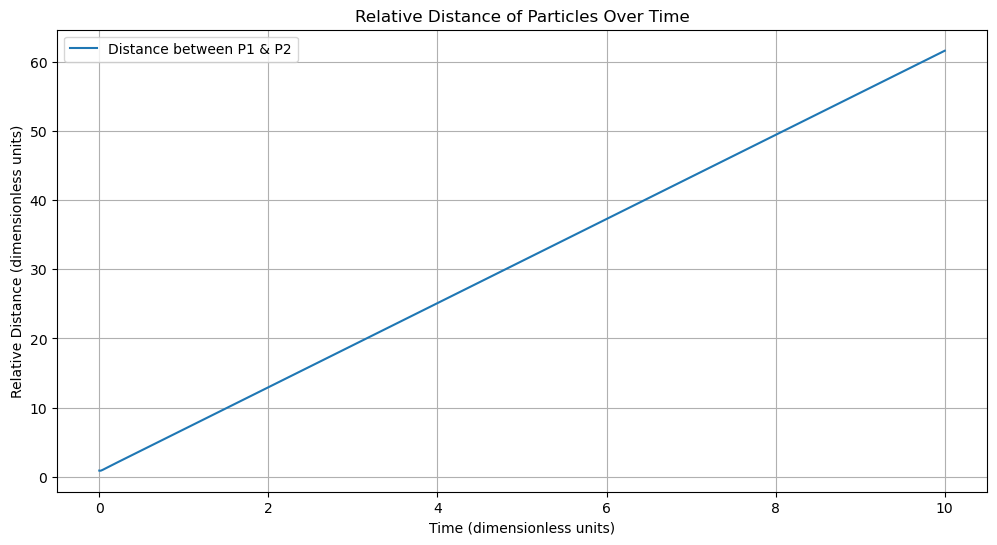

In [80]:
#We assume a simple simulation with simple parameters first - and let sigma, epsilon and m_a to be all 1.0
sim = NBodySimulation_T1(
    positions=[[0, 0, 0], [0.9, 0, 0]],# Place one particle at the origin and the other on the x-axis
    velocities=[[0.8, 0, 0], [-1.0, 0, 0]],# Start with both particles at rest or with some initial velocity
    masses=[1, 1],# Masses of the particles - standard mass
    dt=0.01# Time step for the simulation
)

steps= 1000
sim.plot_relative_distance(steps)

There is clearly no oscillation between both of the particles when we reduce the initial relative distance of the particles. We need to be mindful on the scale of it. Now, we shall explore the interactions of how Argon particles work in this system. 

## 2 Argon Particles in a Gas System 

In [4]:
boltz_constant = 1.380649e-23
epsilon_argon = 125.7 * boltz_constant
sigma_argon = 0.3345e-9
ma_argon = 6.634e-26

sim_argon = NBodySimulation_T1(
    positions=[[3, 2, 0], [3, 0, 0]],  
    velocities=[[2.0, 0, 0], [-2.0, 0, 0]],
    masses=[ma_argon, ma_argon],  #In Kilograms
    dt=0.01,
    ma=ma_argon,  # Atomic mass of argon atom in kg
    sigma=sigma_argon,  # Characteristic length scale in meters
    epsilon=epsilon_argon  # Characteristic Energy Level
)

sim_argon.print_char()

The Characteristic Timescale for this particle(τ) is:2.0681144807395748e-12 units
The Characteristic speed (σ/τ) is:161.74152984044676 units/s


The argon particles have reasonable characteristic timescale and speed. 

The value of 2.06e-12 is typical for molecular dynamics simulation where fast movements of atoms are tracked. 

The characteristic speed is about 161.74, which is also a reasonable average speed for argon atoms under regular conditions like (temperature and volume). The speed of air in room temperature is 300m/s. 

## General N Particles in a Gas System 

We can also generate a system with N-number of particles in the system. In the following example, we are using numpy to generate the intial conditions for 7 particles. We will also observe the relative distance between each particle. 

In [87]:
#Setting a seed for reproducability 
np.random.seed(30)

#Number of particles
num_particles = 7

#Generate 3D Random Initial positions within [-5,5] for each particle 
positions = np.random.uniform(-2,2,size=(num_particles,3))

#Generate 3D Random Initial Velocities within [-1,1] for each particle. 
velocities = np.random.uniform(-1,1, size=(num_particles,3))

#Generate uniform mass for each particle 
masses = np.random.uniform(0.5, 1, size=num_particles)

#Generate Instance based on standard parameters. 
sim_5 = NBodySimulation_T1(positions, velocities, masses, dt=0.01, ma=1.0, sigma=1.0, epsilon=1)

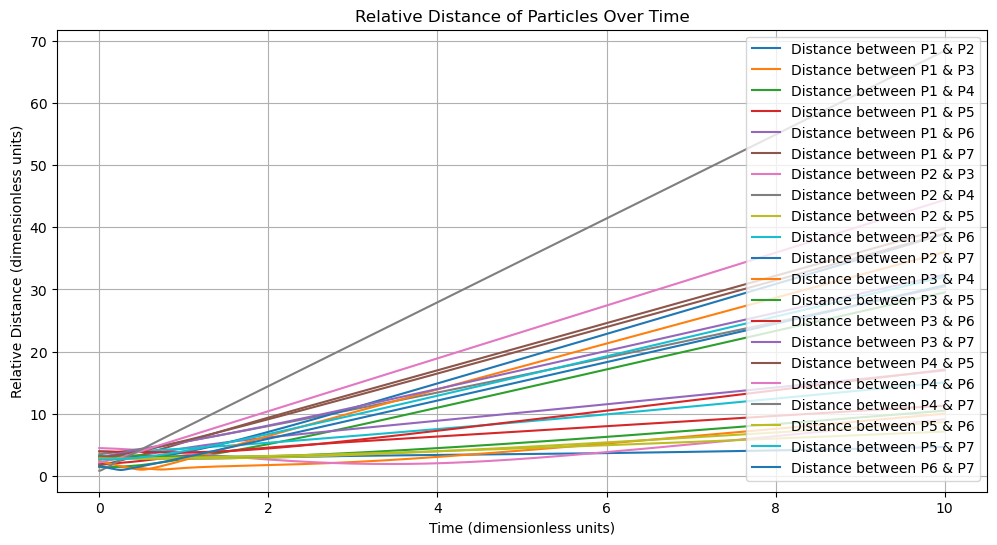

In [88]:
num_steps = 1000

sim_5.plot_relative_distance(num_steps)

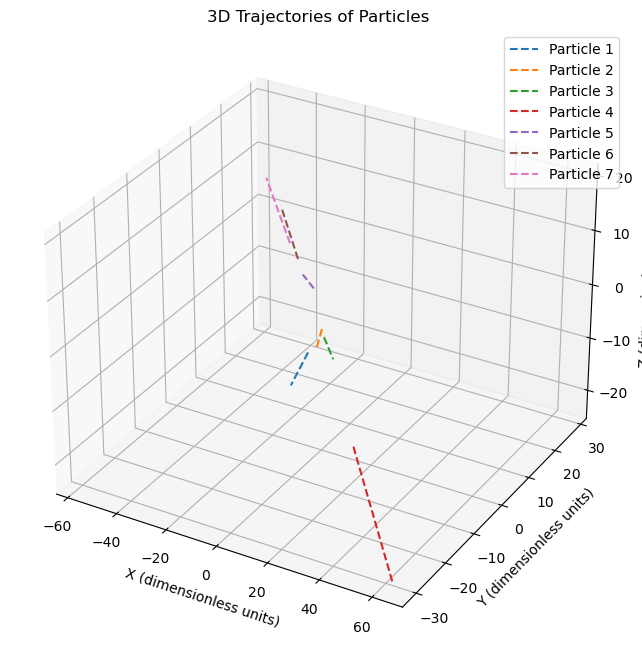

In [7]:
sim_5.plot_particle_trajectories(num_steps)

As witnessed above, it is very hard to obtain an oscilatting behaviour between all of the particles. Due to the random behavior of the particles , most of the particles seem to drift away from each other. This is because the gas-system was established without any boundaries , making oscillating behaviour very unlikely in an open area. However, given the right conditions (seed), the particles can demonstrate this behaviour as shown below, which I think looks very beautiful. 

In [97]:
#Setting a seed for reproducability 
np.random.seed(88)

#Number of particles
num_particles = 7

#Generate 3D Random Initial positions within [-5,5] for each particle 
positions = np.random.uniform(-2,2,size=(num_particles,3))

#Generate 3D Random Initial Velocities within [-1,1] for each particle. 
velocities = np.random.uniform(-1,1, size=(num_particles,3))

#Generate uniform mass for each particle 
masses = np.random.uniform(0.5, 1, size=num_particles)

#Generate Instance based on standard parameters. 
sim_5 = NBodySimulation_T1(positions, velocities, masses, dt=0.01, ma=1.0, sigma=1.0, epsilon=1)

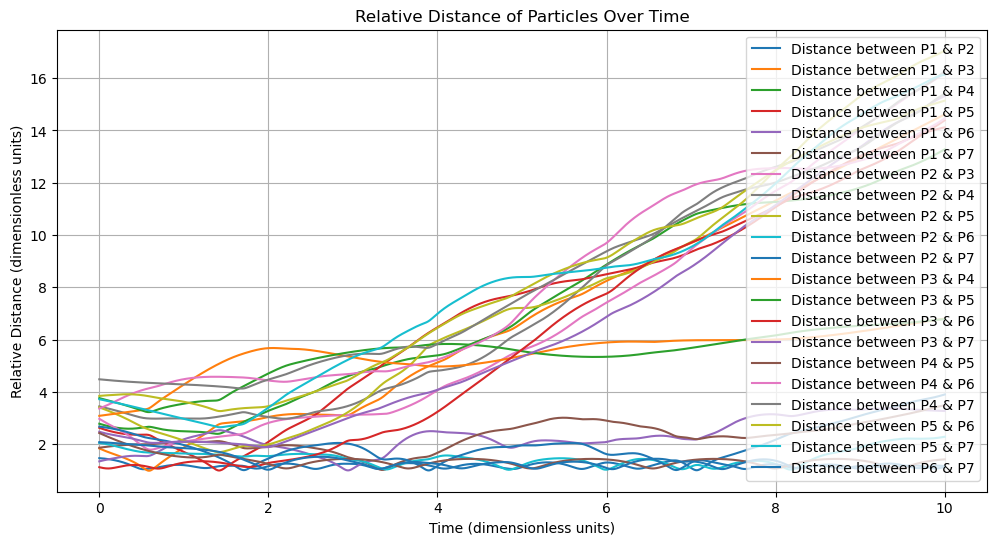

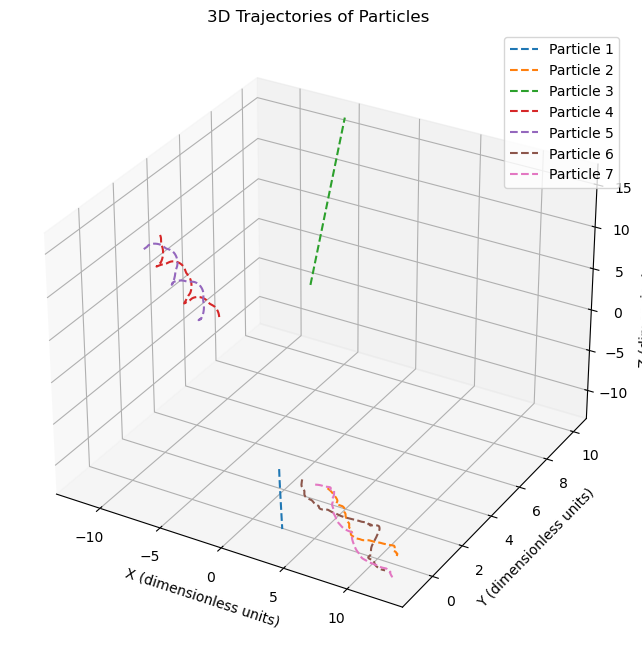

In [98]:
num_steps = 1000

sim_5.plot_relative_distance(num_steps)
sim_5.plot_particle_trajectories(num_steps)

However, to consistently replicate this will be hard. So, we introduce boundaries to our system to properly examine the characteristics of the gas. 

# Task 2 - Particles in a box 

In task 2, we set boundary conditions to our existing environment from Task 1 - assuming that the centre of the box is centred on the origin and the particles rebound ELASTICALLY from the walls of the box 

We created 2 additional methods to fullfil this demand. (check Python File to indentify the changes)

In [10]:
import numpy as np 
import matplotlib.pyplot as plt

#Import Task 2 Code from a seperate Python File 
from Task_2 import NBodySimulation_T2

Now, that the boundaries of the 3D box has been set. Let's examine how the trajectory and relative distance of 8 particles evolve over time.

In [11]:
#Number of particles
num_particles = 8

#Generate 3D Random Initial positions within [-1,1] for each particle 
positions = np.random.uniform(-2,2,size=(num_particles,3))

#Generate 3D Random Initial Velocities within [-1,1] for each particle. 
velocities = np.random.uniform(-1,1, size=(num_particles,3))

#Generate uniform mass for each particle 
masses = np.random.uniform(0.5, 1, size=num_particles)

#Generate Instance based on standard parameters. 
sim_bound = NBodySimulation_T2(positions, velocities, masses, dt=0.01, ma=1.0, sigma=1.0, epsilon=1,L=10)

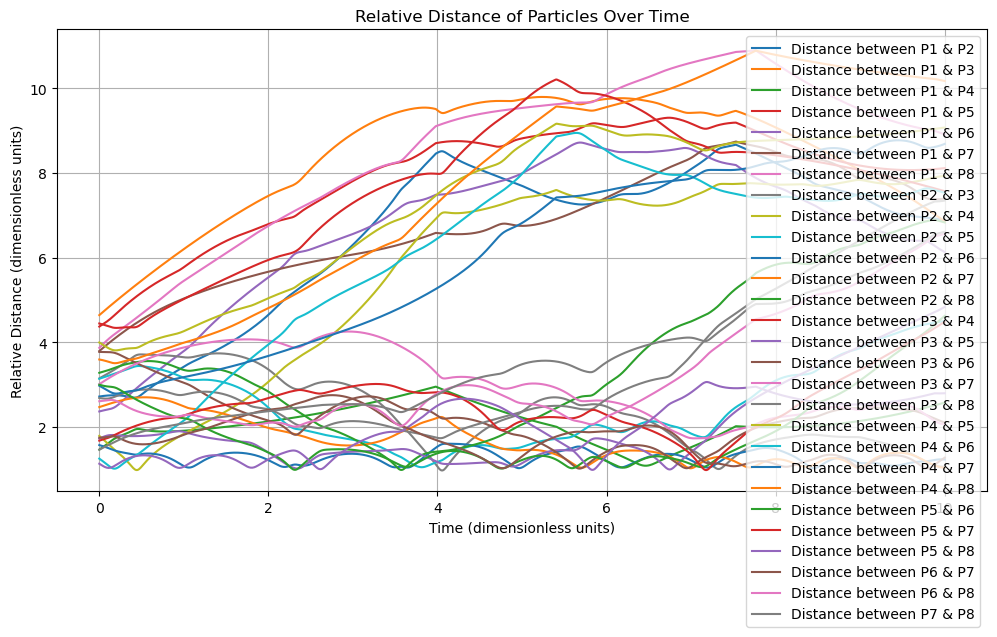

In [12]:
num_steps = 1000

sim_bound.plot_relative_distance(num_steps)

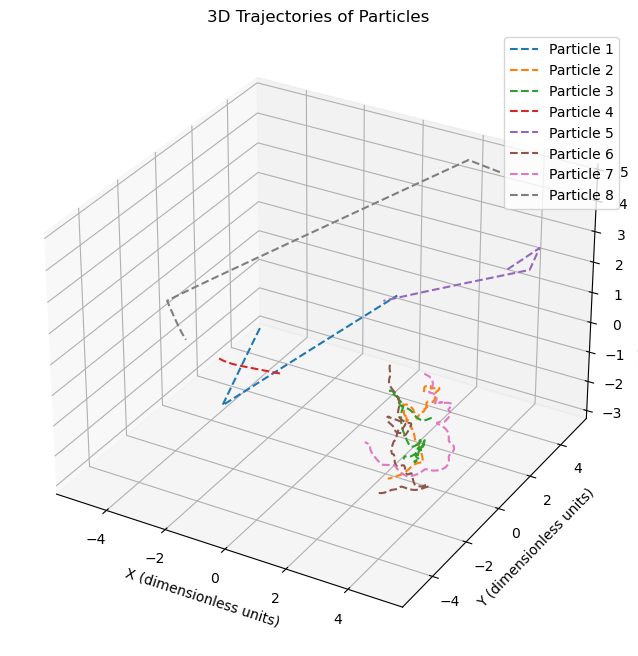

In [13]:
sim_bound.plot_particle_trajectories(num_steps)

From both of the diagrams above ,it looks EXTREMELY MESSY with all the lines in place.

So, to properly show that a particle rebounds of the edges as expected, it needs to fullfill the criterias below. 

1) Elasticity - Velocity component of gas particle is reversed (eg vector changes but scalar does not) 
2) Kinetic energy of particle remains unchanged throughout simulation. 

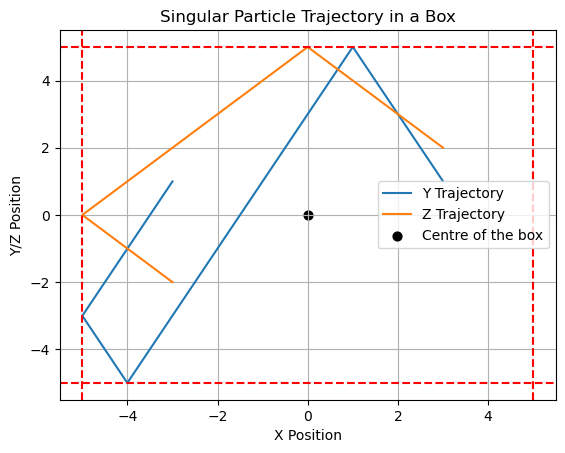

In [14]:
positions = [[3,1,2]] 
velocities = [[-0.1,0.2,0.1]] #Moving towards the left wall while going slightly upwards 
masses = [1.0,1.0]
num_steps = 10000

#Assume simple parameters for this model 
sim_bound = NBodySimulation_T2(positions,velocities,masses)
sim_bound.sim_particle_bouncing(num_steps)

From the diagram above, it is clear that the particle rebounds off the walls of the cube, but we still are not certain whether the velocity is reversed and the kinetic energy is retained in elastic conditions. 

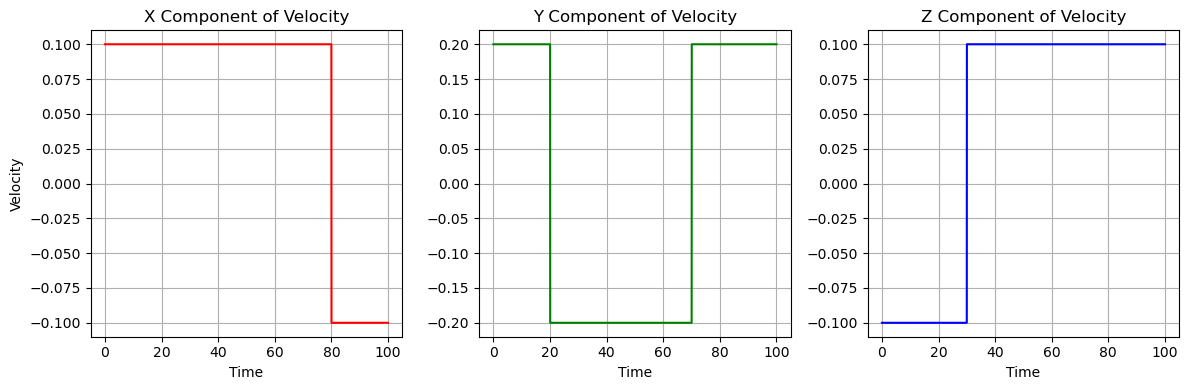

In [15]:
sim_bound.plot_particle_velocity(num_steps)

Clearly, this affirms that the particle rebounds elastically because the velocity components change direction only while scalar remains the same. To completely affirm that the singular gas particle rebounds elastically, we need to check that the kinetic energy stays constant throughout the duration. 

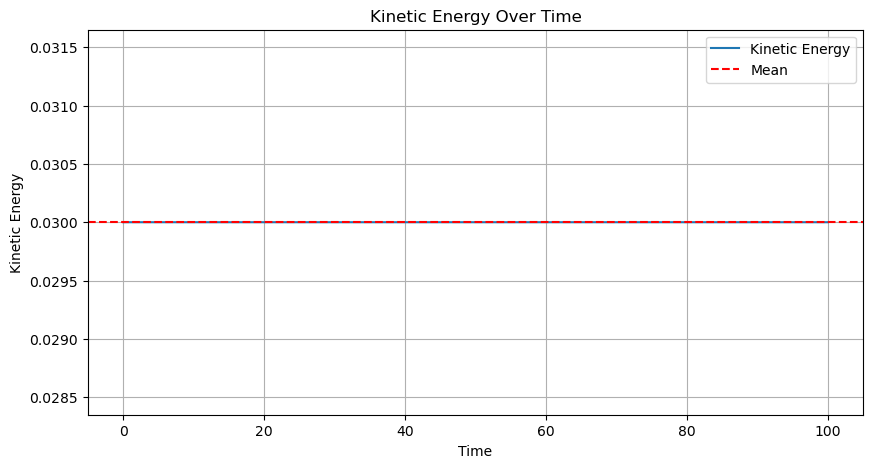

In [16]:
kinetic_energy , rolling_average = sim_bound.calculate_kinetic_energy(num_steps)

sim_bound.plot_kinetic_energy(kinetic_energy, num_steps)

As expected, the kinetic energy remains the same throughout the duration. Now, we will explore task 3.

## Task 3 - Investigate! 

Now, we will investigate the behaviour of the gas. We want to know how the pressure changes with volume of the box and the temperature of the gas. 

First, we need to calculate the pressure of the gas and the temperature ( represented by total kinetic energy ). 

In [17]:
import sympy
import time
from itertools import combinations

#Import Task 3 Code from a seperate Python File 
from Task_3 import NBodySimulation_T3

### Particle Initialisation

In [18]:
#Function which finds the best combo of factors. 
def find_best_factors(n):
    start = time.time()
    #Handling for prime numbers 
    if sympy.isprime(n):
        return (1,1,n) #Simplistic Approach
    
    divisors = sorted(sympy.divisors(n))
    min_diff = float('inf')
    best_factors = None
    
    # Check all possible combinations of three divisors that produce n when multiplied
    for combo in combinations(divisors, 3):
        if np.prod(combo) == n:
            diff = max(combo) - min(combo)
            if diff < min_diff:
                min_diff = diff
                best_factors = combo #Choose the best combo so far 
                if min_diff == 0:
                    break
    
    print(f"Time to find the best combo of factors is {time.time() -start}")
    return best_factors 

In [186]:
#Parameters
num_particles = 100
sigma = 1.0
dt=0.01
ma=1.0
epsilon=1
L=45

combo = find_best_factors(num_particles)
print(combo)

# Modify axis ranges for each dimension and create evenly spaced particles 
x_range = np.linspace(-L/2 + sigma, L/2 - sigma, combo[0])
y_range = np.linspace(-L/2 + sigma, L/2 - sigma, combo[1])
z_range = np.linspace(-L/2 + sigma, L/2 - sigma, combo[2])

# Create the meshgrid with matrix indexing 
x, y, z = np.meshgrid(x_range, y_range, z_range, indexing='ij')
positions = np.vstack([x.ravel(), y.ravel(), z.ravel()]).T

#Generate 3D Random Initial Velocities within [-1,1] for each particle. 
velocities = np.random.uniform(-1,1, size=(num_particles,3))

#Generate uniform mass for each particle 
masses = np.random.uniform(1, 1, size=num_particles)

#Standard parameters - creating an instance from Task 3 
sim = NBodySimulation_T3(positions, velocities, masses, dt, ma, sigma, epsilon , L)

Time to find the best combo of factors is 0.0019931793212890625
(2, 5, 10)


We generate the pressure over time in the positive x-direction. [As particles hit the y-z plane]

In [187]:
num_steps = 10000
direction = 'X'
plane_side = 'Positive' 
window_size = 200

pressure , rolling_average_pressure = sim.calculate_directional_pressure(num_steps, direction, plane_side, window_size, output = 'Yes')

Time to calculate pressure 12.550495862960815 seconds
The mean of the rolling average pressure in the Positive X direction is 0.00034261105954470043
Time to calculate the rolling pressure average is 0.01507258415222168 seconds


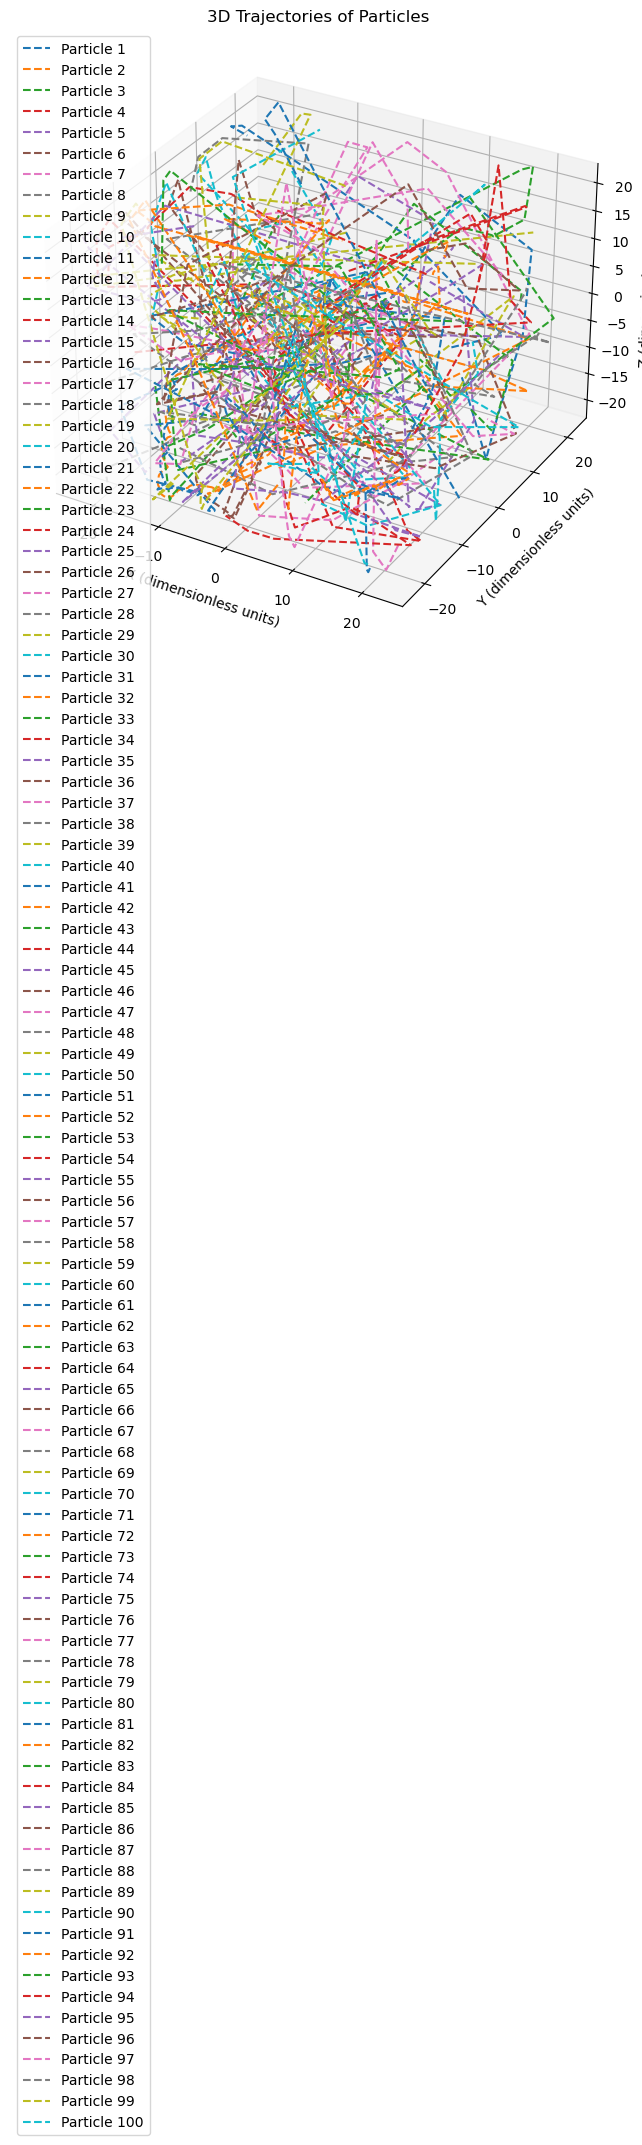

In [188]:
sim.plot_particle_trajectories(num_steps)

The above 3D Trajectory diagram is for visualisation of what the interactions of the gas particles might look like. Now, we test 
for pressure and kinetic energy over time. 

### Directional-Pressure Plotting

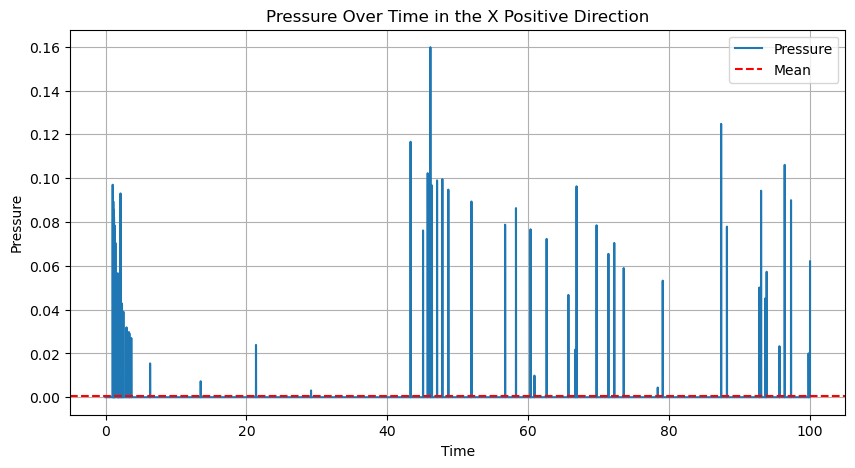

In [189]:
sim.plot_pressure_direction(pressure , num_steps, direction, plane_side)

In [190]:
kinetic_energy , rolling_average_kinetic_energy = sim.calculate_kinetic_energy(num_steps, window_size)

### Kinetic Energy Plotting

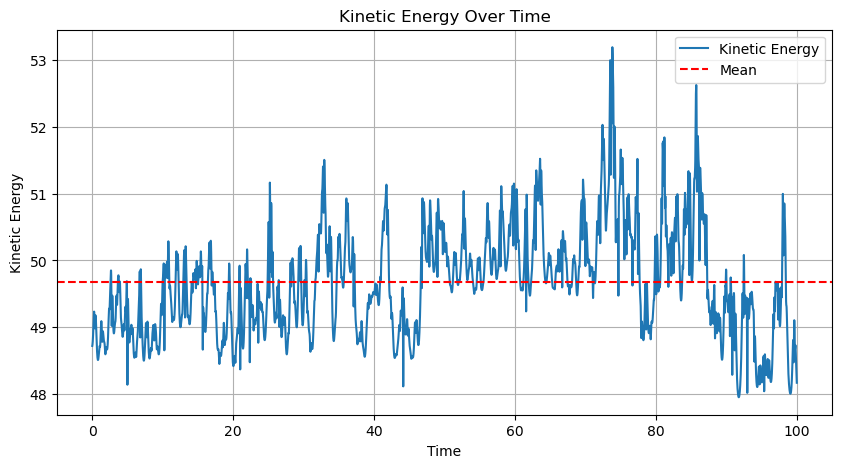

In [191]:
#Compute one for kinetic energy
sim.plot_kinetic_energy(kinetic_energy, num_steps)

Due to stochastic nature of temperature and pressure estimates due to miscroscopic time scales, we should complete this with a time-averaging technique which helps to smooth out the graph. 

###  Time-Averaging Plots

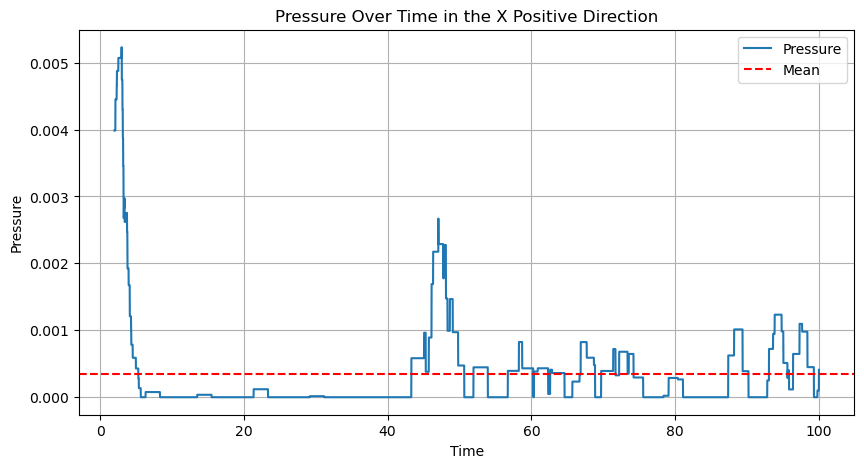

In [192]:
sim.plot_pressure_direction(rolling_average_pressure, num_steps, direction, plane_side)

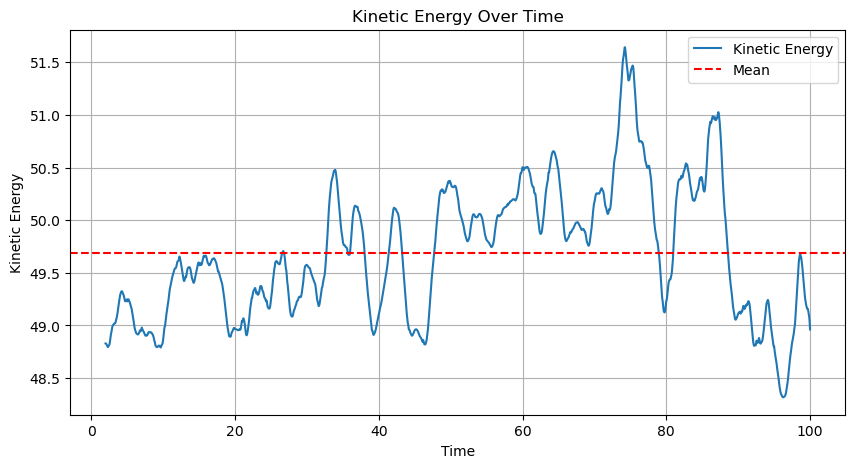

In [193]:
sim.plot_kinetic_energy(rolling_average_kinetic_energy, num_steps)

The plots are much smoother. They also fluctate around a mean value which is typical behaviour for a system under equilibrium.

### Proving Isotropy 

In [195]:
# Calculate pressures for a sufficient number of steps to ensure equilibrium
num_steps = 10000
window_size = 200

pressures_positive_x , rolling_average_x_positive_pressure = sim.calculate_directional_pressure(num_steps, 'X', 'positive', window_size, output = 'Yes')
pressures_negative_x , rolling_average_x_negative_pressure = sim.calculate_directional_pressure(num_steps, 'X', 'negative', window_size, output = 'Yes')
pressures_positive_y , rolling_average_y_positive_pressure = sim.calculate_directional_pressure(num_steps, 'Y', 'positive', window_size, output = 'Yes')
pressures_negative_y , rolling_average_y_negative_pressure = sim.calculate_directional_pressure(num_steps, 'Y', 'negative', window_size, output = 'Yes')
pressures_positive_z , rolling_average_z_positive_pressure = sim.calculate_directional_pressure(num_steps, 'Z', 'positive', window_size, output = 'Yes')
pressures_negative_z , rolling_average_z_negative_pressure = sim.calculate_directional_pressure(num_steps, 'Z', 'negative', window_size, output = 'Yes')

Time to calculate pressure 12.601413488388062 seconds
The mean of the rolling average pressure in the positive X direction is 0.0003188880670104865
Time to calculate the rolling pressure average is 0.14988136291503906 seconds
Time to calculate pressure 12.376047372817993 seconds
The mean of the rolling average pressure in the negative X direction is 0.00034108699815156774
Time to calculate the rolling pressure average is 0.005074262619018555 seconds
Time to calculate pressure 12.470889568328857 seconds
The mean of the rolling average pressure in the positive Y direction is 0.00026629349963407014
Time to calculate the rolling pressure average is 0.008157014846801758 seconds
Time to calculate pressure 12.484458208084106 seconds
The mean of the rolling average pressure in the negative Y direction is 0.00033908896585394145
Time to calculate the rolling pressure average is 0.0 seconds
Time to calculate pressure 12.658106327056885 seconds
The mean of the rolling average pressure in the posit

We can prove isotropy by calculating the pressure in all directiosn of the cube. In theory, pressure should be equal in all directions. However, due to practicality, the pressure fluctuates around a mean value. The mean values are equal when we round up the values to 3 decimal places, ( SOMETIMES, with the exception of some sides which don't ). 

### Total Pressure Plotting 

Since we have proved isotropy, we can plot the total pressure of the system over time using the (total_pressure) method. 

The mean of the total pressure is 0.005640497920883749


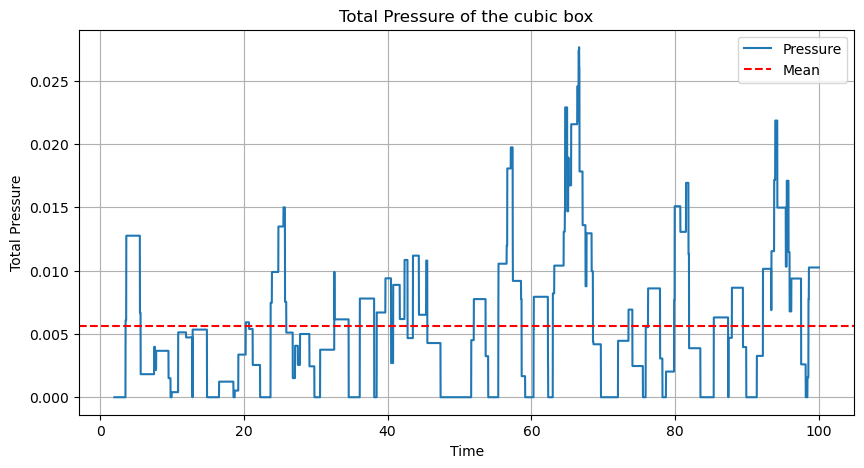

In [28]:
sim.plot_total_pressure(rolling_average_x_positive_pressure, num_steps)

The mean of the total pressure is 0.00597206069551406


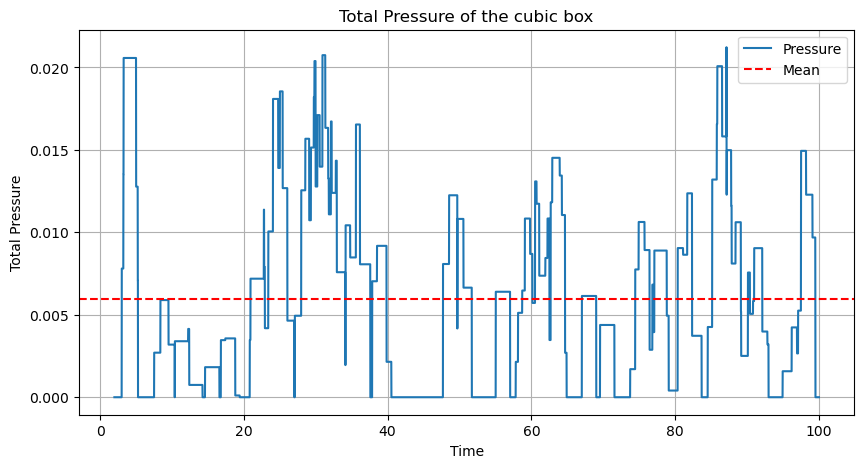

In [29]:
sim.plot_total_pressure(rolling_average_x_negative_pressure, num_steps)

Since pressure in any direction is roughly the same, the total pressure calculated from any direction should equate roughly the same!

## How does pressure of the gas change with changes in the volume of the box and the temperature of the gas?

To investigate the effects of volume and temperature on the pressure of the gas, we need to make one variable constant and the rest. Now, we investigate the pressure as temperature increases for a standard particle where all parameter values are set to 1. 

## Temperature vs Pressure (STANDARD PARTICLE ) 

In [204]:
import numpy as np 

#Parameters for temperature vs pressure 
num_particles = 140
sigma = 1.0
dt=0.01
ma=1.0
epsilon=1
L=15

combo = find_best_factors(num_particles)
print(combo)

# Modify axis ranges for each dimension and create EVENLY Spaced particles 
x_range = np.linspace(-L/2 + sigma, L/2 - sigma, combo[0])
y_range = np.linspace(-L/2 + sigma, L/2 - sigma, combo[1])
z_range = np.linspace(-L/2 + sigma, L/2 - sigma, combo[2])

# Create the 3D meshgrid with matrix indexing 
#.ravel() flattens the matrix into a 1D array 
# .vstack stacks them vertically on top of each other 
x, y, z = np.meshgrid(x_range, y_range, z_range, indexing='ij')
positions = np.vstack([x.ravel(), y.ravel(), z.ravel()]).T

#Generate 3D Random Initial Velocities within [-1,1] for each particle. 
velocities = np.random.uniform(-1,1, size=(num_particles,3))

#Generate uniform mass for each particle 
masses = np.random.uniform(1, 1, size=num_particles)

Time to find the best combo of factors is 0.0029897689819335938
(4, 5, 7)


In order to vary the pressure (kinetic energy) , we have to increase the range of the velocity of the particles as carried out in the method. 

Time taken to calculate values for plot is 9.328689336776733
R-squared score: 0.7633261784705032


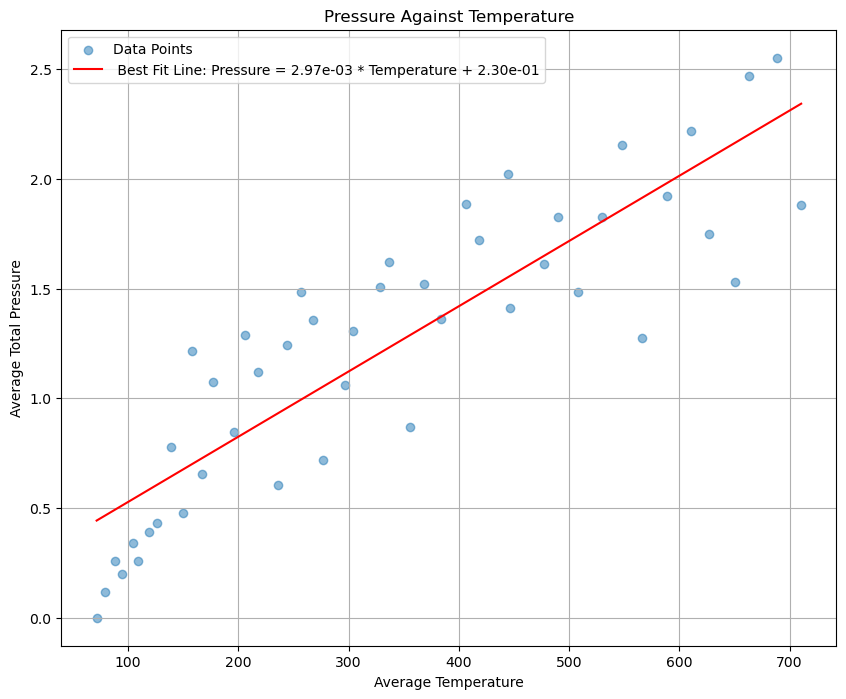

In [205]:
num_steps = 45
window_size = 20

sim_temp_pres = NBodySimulation_T3(positions, velocities, masses, dt, ma, sigma, epsilon ,L)

sim_temp_pres.plot_pressure_against_temp(num_steps, window_size)

As examined from the diagram, there is a clear **Positive linear relationship** between pressure and temperature. As temperature increases, the pressure increases. The R-squared score is also displayed, a value closer to 1 means that it has a perfect goodness of fit of the linear model. 

## Volume vs Pressure (STANDARD PARTICLE)

Now, we shall explore the effects of volume on pressure. Here, we will use very similar parameters to model our code except now we will vary the dimension of the simulation. 

In [206]:
#Parameters for Volume vs Pressure 
num_particles = 170
sigma = 1.0
dt=0.01
ma=1.0
epsilon=1
L=5

combo = find_best_factors(num_particles)
print(combo)

# Modify axis ranges for each dimension and create EVENLY Spaced particles 
x_range = np.linspace(-L/2 + sigma, L/2 - sigma, combo[0])
y_range = np.linspace(-L/2 + sigma, L/2 - sigma, combo[1])
z_range = np.linspace(-L/2 + sigma, L/2 - sigma, combo[2])

# Create the 3D meshgrid with matrix indexing 
#.ravel() flattens the matrix into a 1D array 
# .vstack stacks them vertically on top of each other 
x, y, z = np.meshgrid(x_range, y_range, z_range, indexing='ij')
positions = np.vstack([x.ravel(), y.ravel(), z.ravel()]).T

#Generate 3D Random Initial Velocities within [-1,1] for each particle. 
velocities = np.random.uniform(-1,1, size=(num_particles,3))

#Generate uniform mass for each particle 
masses = np.random.uniform(1, 1, size=num_particles)

Time to find the best combo of factors is 0.0
(2, 5, 17)


Time taken to calculate values for plot is 19.790935277938843


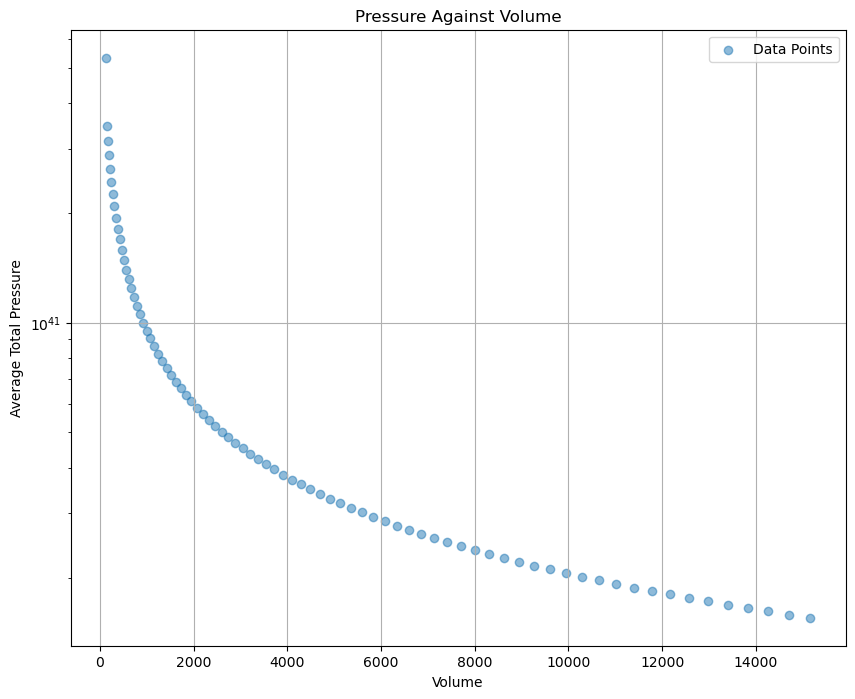

In [207]:
num_steps = 80
window_size = 20

sim_temp_vol = NBodySimulation_T3(positions, velocities, masses, dt, ma, sigma, epsilon ,L)

sim_temp_vol.plot_pressure_against_vol(num_steps, window_size, combo)

As examined from the diagram, there is a logarithm function present. A **line of best fit** is _NOT NEEDED_ as the raw values have already demonstrated a **logarithm behaviour.**   As volume decreases, pressure decreases indefinitely into some finite value. At 0 Volume, pressure _approaches_ inifinity (acting like a log function).  

## Temperatue vs Pressure ( Argon Particles ) 

We will see how the simulation works for N argon particles. 

In [208]:
#Parameters for Argon Particles (Temperature vs Pressure)
boltz_constant = 1.380649e-23
num_particles = 100
sigma = 0.3345e-9
dt=0.01
ma= 6.634286e-26
epsilon = 125.7 * boltz_constant
L= 15

combo = find_best_factors(num_particles)
print(combo)

# Modify axis ranges for each dimension and create EVENLY Spaced particles 
x_range = np.linspace(-L/2 + sigma, L/2 - sigma, combo[0])
y_range = np.linspace(-L/2 + sigma, L/2 - sigma, combo[1])
z_range = np.linspace(-L/2 + sigma, L/2 - sigma, combo[2])

# Create the 3D meshgrid with matrix indexing 
#.ravel() flattens the matrix into a 1D array 
# .vstack stacks them vertically on top of each other 
x, y, z = np.meshgrid(x_range, y_range, z_range, indexing='ij')
positions = np.vstack([x.ravel(), y.ravel(), z.ravel()]).T

#Generate 3D Random Initial Velocities within [-1,1] for each particle. 
velocities = np.random.uniform(-1,1, size=(num_particles,3))

#Sets all particle masses to single value 
masses = np.full(num_particles, 6.634286e-26 )

Time to find the best combo of factors is 0.0009963512420654297
(2, 5, 10)


Time taken to calculate values for plot is 3.901771306991577
R-squared score: 0.9999999999999984


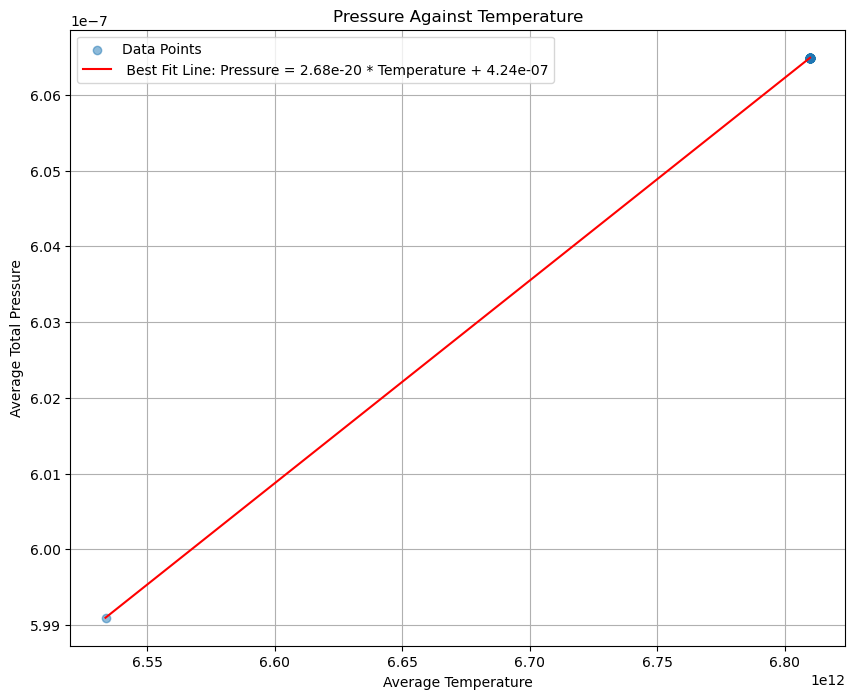

In [209]:
num_steps = 40
window_size = 30

sim_temp_pres = NBodySimulation_T3(positions, velocities, masses, dt, ma, sigma, epsilon ,L)

sim_temp_pres.plot_pressure_against_temp(num_steps, window_size)

Atom gases are noble gases and interact one another via van der Waals forces, which is well described by Lennard-Jones potential. Since this simulation uses this potential, it naturally results in a good fit. The fit is not done by random chance as this simulation was proven using a large pool of data ( 200 particles ). As examined from the diagram above, this **STILL** demonstrates a positive linear relationship between temperature and pressure. 

However, this runs the risk of overfitting and can prove dangerous for unseen data. 

## Volume vs Pressure ( Argon Particles ) 

In [212]:
#Parameters for Argon Particles (Volume vs Pressure) 
boltz_constant = 1.380649e-23
num_particles = 170
sigma = 0.3345e-9
dt=0.01
ma = 6.634286e-26
epsilon = 125.7 * boltz_constant
L=5

combo = find_best_factors(num_particles)
print(combo)

# Modify axis ranges for each dimension and create EVENLY Spaced particles 
x_range = np.linspace(-L/2 + sigma, L/2 - sigma, combo[0])
y_range = np.linspace(-L/2 + sigma, L/2 - sigma, combo[1])
z_range = np.linspace(-L/2 + sigma, L/2 - sigma, combo[2])

# Create the 3D meshgrid with matrix indexing 
#.ravel() flattens the matrix into a 1D array 
# .vstack stacks them vertically on top of each other 
x, y, z = np.meshgrid(x_range, y_range, z_range, indexing='ij')
positions = np.vstack([x.ravel(), y.ravel(), z.ravel()]).T

#Generate 3D Random Initial Velocities within [-1,1] for each particle. 
velocities = np.random.uniform(-1,1, size=(num_particles,3))

#Sets all particle masses to single value 
masses = np.full(num_particles, 6.634286e-26 )

Time to find the best combo of factors is 0.0
(2, 5, 17)


Time taken to calculate values for plot is 31.540923833847046


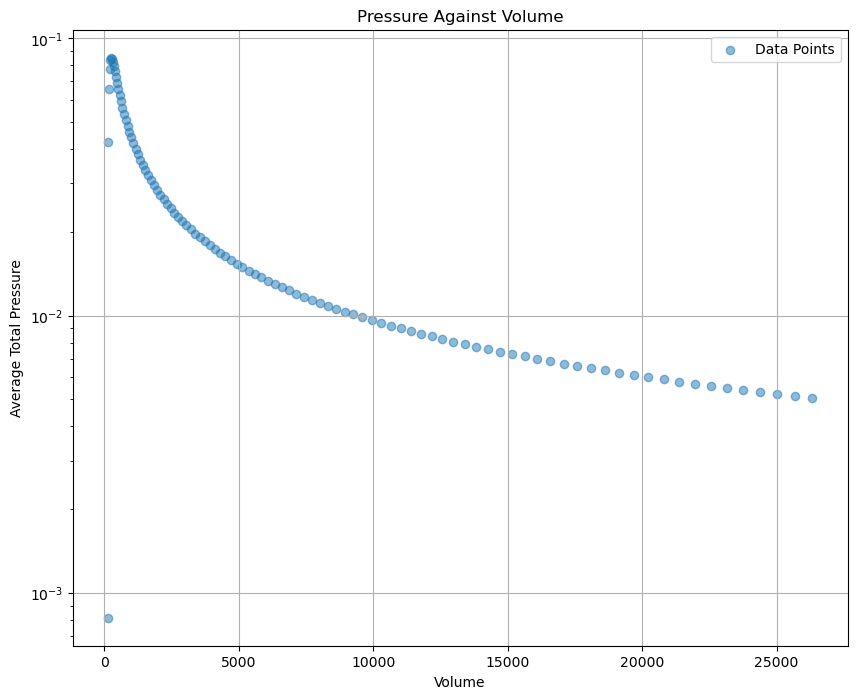

In [213]:
num_steps = 100
window_size = 20

sim_temp_vol = NBodySimulation_T3(positions, velocities, masses, dt, ma, sigma, epsilon ,L)

sim_temp_vol.plot_pressure_against_vol(num_steps, window_size, combo)

As examined from the diagram, there is STILL an inverse relationship between pressure and volume. Still a line of best fit is not needed, as a logarithm graph is observed. The plot shows that volume increases by multiples, the pressure drops rapidly at first and then more slowly, levelling off to a finite value as the pressure **approaches infinity.** 